In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dados = pd.read_csv('data.csv')

In [3]:
dados.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
dados = dados.drop(['id','Unnamed: 32'],axis=1)

In [5]:
dados.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Text(0.5, 1.0, 'Contagem tipo diagnóstico')

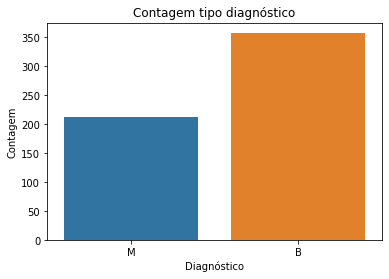

In [7]:
sns.countplot(x='diagnosis',data=dados)
plt.xlabel('Diagnóstico')
plt.ylabel('Contagem')
plt.title('Contagem tipo diagnóstico')

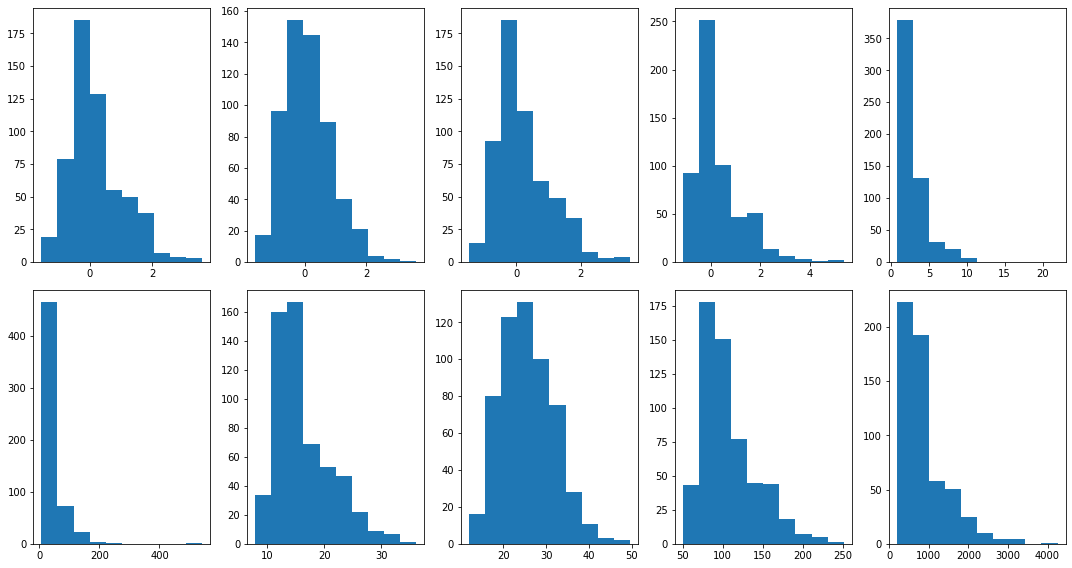

In [37]:
fig,ax=plt.subplots(2,5,figsize=(15,8))
ax[0][0].hist(dados['radius_mean'])
ax[0][1].hist(dados['texture_mean'])
ax[0][2].hist(dados['perimeter_mean'])
ax[0][3].hist(dados['area_mean'])
ax[0][4].hist(dados['perimeter_se'])
ax[1][0].hist(dados['area_se'])
ax[1][1].hist(dados['radius_worst'])
ax[1][2].hist(dados['texture_worst'])
ax[1][3].hist(dados['perimeter_worst'])
ax[1][4].hist(dados['area_worst'])
plt.tight_layout()

In [38]:
colunas_normalizar = ['radius_mean','texture_mean','perimeter_mean','area_mean','perimeter_se','area_se','radius_worst',
                     'texture_worst','perimeter_worst','area_worst']

In [45]:
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split, cross_val_score,KFold,StratifiedKFold
from sklearn.preprocessing import RobustScaler,StandardScaler,LabelEncoder

In [86]:
enconder = LabelEncoder()
dados['diagnosis'] = enconder.fit_transform(dados['diagnosis'])

In [41]:
dados.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.132353,-1.502664,1.263740,1.241446,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,1.764706,-0.190053,1.612859,2.138245,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,1.549020,0.428064,1.512617,1.798841,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,-0.477941,0.273535,-0.299343,-0.455298,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,1.696078,-0.799290,1.688904,2.058223,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [42]:
scaler = RobustScaler()
for col in colunas_normalizar:
    dados[col] = scaler.fit_transform(dados[col].values.reshape(-1,1))

In [44]:
dados.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.132353,-1.502664,1.263740,1.241446,0.11840,0.27760,0.3001,0.14710,0.2419,...,1.801038,-0.935185,2.105595,2.343063,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,1.764706,-0.190053,1.612859,2.138245,0.08474,0.07864,0.0869,0.07017,0.1812,...,1.733564,-0.231481,1.480746,2.232284,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,1.549020,0.428064,1.512617,1.798841,0.10960,0.15990,0.1974,0.12790,0.2069,...,1.487889,0.013889,1.328167,1.797960,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,-0.477941,0.273535,-0.299343,-0.455298,0.14250,0.28390,0.2414,0.10520,0.2597,...,-0.010381,0.126157,0.029305,-0.208897,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,1.696078,-0.799290,1.688904,2.058223,0.10030,0.13280,0.1980,0.10430,0.1809,...,1.309689,-1.011574,1.320901,1.562335,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [48]:
X = dados.drop(['diagnosis'],axis=1)
Y = dados['diagnosis']

In [50]:
strat_kfold = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for indice_treino, indice_teste in strat_kfold.split(X, Y):
    #print("Treino:", indice_treino, "Teste:", indice_teste)
    X_treino, X_teste = X.iloc[indice_treino], X.iloc[indice_teste]
    Y_treino, Y_teste = Y.iloc[indice_treino], Y.iloc[indice_teste]

In [99]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,average_precision_score,classification_report,recall_score

In [105]:
from sklearn.model_selection import GridSearchCV

In [58]:
from sklearn.linear_model import LogisticRegression

In [107]:
print("Logistic Regression")
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.0001,0.001, 0.01, 0.1, 1, 10, 100, 1000,10000,100000], 
                  'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
grid_log_reg = GridSearchCV(LogisticRegression(max_iter=2000), log_reg_params,n_jobs=8,cv=10)
grid_log_reg.fit(X_treino, Y_treino)
logreg = grid_log_reg.best_estimator_
log_reg_score = cross_val_score(logreg, X_treino, Y_treino, cv=10)
print("Best Estimator")
print(logreg)
print('Score Regressao Logistica Validacao Cruzada: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression
Best Estimator
LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
Score Regressao Logistica Validacao Cruzada:  96.71%


In [108]:
logreg.fit(X_treino,Y_treino)
Y_pred_logreg = logreg.predict(X_teste)
cm_logreg = confusion_matrix(Y_teste,Y_pred_logreg)
acc_score_logreg = accuracy_score(Y_teste,Y_pred_logreg)
f1_score_logreg = f1_score(Y_teste,Y_pred_logreg)
precisao_logreg = average_precision_score(Y_teste,Y_pred_logreg)
recall_logreg = recall_score(Y_teste,Y_pred_logreg)
print('Acuracia Regressão Logistica ',round(acc_score_logreg*100,2).astype(str)+'%')
print('Precião média Regressão Logistica ',round(precisao_logreg*100,2).astype(str)+'%')
print('F1 Regressão Logistica ',round(f1_score_logreg*100,2).astype(str)+'%')
print('Recall Regressão Logistica ',round(recall_logreg*100,2).astype(str)+'%')

Acuracia Regressão Logistica  98.23%
Precião média Regressão Logistica  95.45%
F1 Regressão Logistica  97.67%
Recall Regressão Logistica  100.0%


[Text(0, 0.5, 'B'), Text(0, 1.5, 'M')]

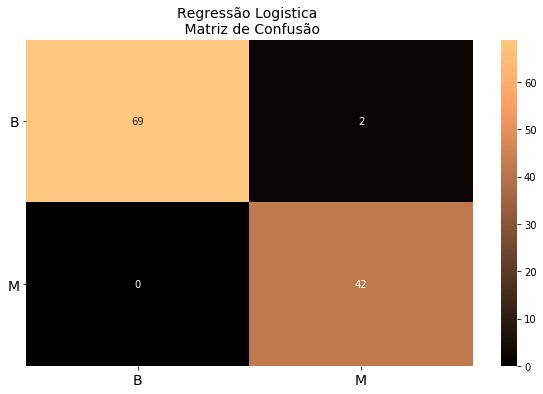

In [109]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(cm_logreg, ax=ax, annot=True, cmap=plt.cm.copper)
ax.set_title("Regressão Logistica \n Matriz de Confusão", fontsize=14)
ax.set_xticklabels(['B', 'M'], fontsize=14, rotation=0)
ax.set_yticklabels(['B', 'M'], fontsize=14, rotation=360)

In [102]:
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier

In [117]:
print("KNN")
knears_params = {"n_neighbors": list(range(5,40,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                'leaf_size' : list(range(2,40,1))}
grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params,n_jobs=8,cv=10)
grid_knears.fit(X_treino, Y_treino)
knn = grid_knears.best_estimator_
knears_score = cross_val_score(knn, X_treino, Y_treino, cv=10)
print("Best Estimator")
print(knn)
print('Score KNN Validacao Cruzada: ', round(knears_score.mean() * 100, 2).astype(str) + '%')

KNN
Best Estimator
KNeighborsClassifier(algorithm='auto', leaf_size=2, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=2,
                     weights='uniform')
Score KNN Validacao Cruzada:  94.09%


In [118]:
knn.fit(X_treino,Y_treino)
Y_pred_knn = knn.predict(X_teste)
cm_knn = confusion_matrix(Y_teste,Y_pred_knn)
acc_score_knn = accuracy_score(Y_teste,Y_pred_knn)
f1_score_knn = f1_score(Y_teste,Y_pred_knn)
precisao_knn = average_precision_score(Y_teste,Y_pred_knn)
recall_knn = recall_score(Y_teste,Y_pred_knn)
print('Acuracia KNN ',round(acc_score_knn*100,2).astype(str)+'%')
print('Precião média KNN ',round(precisao_knn*100,2).astype(str)+'%')
print('F1 KNN ',round(f1_score_knn*100,2).astype(str)+'%')
print('Recall KNN ',round(recall_knn*100,2).astype(str)+'%')

Acuracia KNN  96.46%
Precião média KNN  91.85%
F1 KNN  95.35%
Recall KNN  97.62%


[Text(0, 0.5, 'B'), Text(0, 1.5, 'M')]

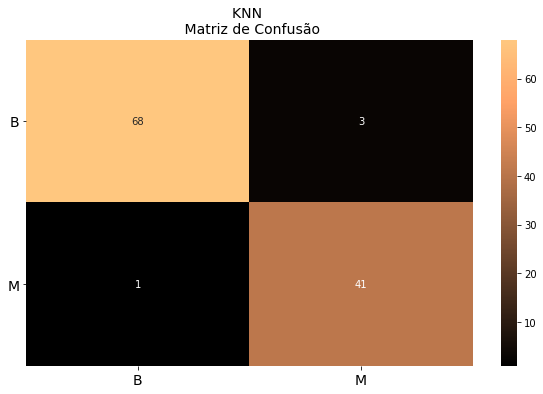

In [119]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(cm_knn, ax=ax, annot=True, cmap=plt.cm.copper)
ax.set_title("KNN \n Matriz de Confusão", fontsize=14)
ax.set_xticklabels(['B', 'M'], fontsize=14, rotation=0)
ax.set_yticklabels(['B', 'M'], fontsize=14, rotation=360)

In [120]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [123]:
print("Ada Boost Classifier")
ada_params = {'n_estimators' : [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80], 'learning_rate' : [0.001,0.01,0.1,1.0], 'algorithm' : ['SAMME','SAMME.R']}
grid_ada = GridSearchCV(AdaBoostClassifier(), ada_params,n_jobs=8,cv=10)
grid_ada.fit(X_treino, Y_treino)
ada = grid_ada.best_estimator_
print("Best Estimator")
print(ada)
ada_score = cross_val_score(ada, X_treino, Y_treino, cv=10)
print('Score AdaBoost Validacao Cruzada: ', round(ada_score.mean() * 100, 2).astype(str) + '%')

Ada Boost Classifier
Best Estimator
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=60, random_state=None)
Score AdaBoost Validacao Cruzada:  97.37%


In [125]:
ada.fit(X_treino,Y_treino)
Y_pred_ada = ada.predict(X_teste)
cm_ada = confusion_matrix(Y_teste,Y_pred_ada)
acc_score_ada = accuracy_score(Y_teste,Y_pred_ada)
f1_score_ada = f1_score(Y_teste,Y_pred_ada)
precisao_ada = average_precision_score(Y_teste,Y_pred_ada)
recall_ada = recall_score(Y_teste,Y_pred_ada)
print('Acuracia ADA Boost ',round(acc_score_ada*100,2).astype(str)+'%')
print('Precião média Ada Boost ',round(precisao_ada*100,2).astype(str)+'%')
print('F1 Ada Boost ',round(f1_score_ada*100,2).astype(str)+'%')
print('Recall Ada Boost ',round(recall_ada*100,2).astype(str)+'%')

Acuracia ADA Boost  97.35%
Precião média Ada Boost  95.51%
F1 Ada Boost  96.3%
Recall Ada Boost  92.86%


[Text(0, 0.5, 'B'), Text(0, 1.5, 'M')]

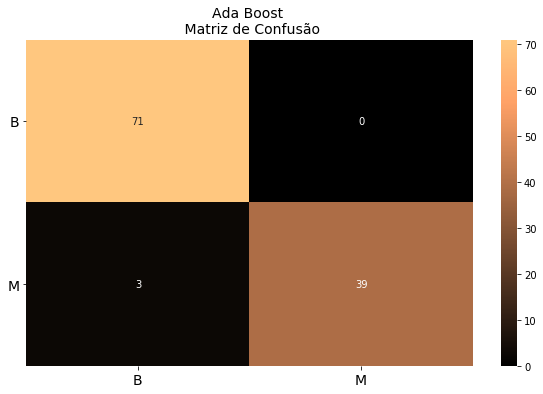

In [126]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(cm_ada, ax=ax, annot=True, cmap=plt.cm.copper)
ax.set_title("Ada Boost \n Matriz de Confusão", fontsize=14)
ax.set_xticklabels(['B', 'M'], fontsize=14, rotation=0)
ax.set_yticklabels(['B', 'M'], fontsize=14, rotation=360)

In [127]:
print("Random Forest Classifier")
forest_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,20,1)), 
              "min_samples_leaf": list(range(3,20,1)), 'max_features' : ['auto','sqrt','log2']}
forest = GridSearchCV(RandomForestClassifier(), forest_params,n_jobs=8,cv=10)
forest.fit(X_treino, Y_treino)
random_forest = forest.best_estimator_
print("Best Estimator")
print(random_forest)
forest_score = cross_val_score(random_forest, X_treino, Y_treino, cv=10)
print('Score RFC Validacao Cruzada: ', round(forest_score.mean() * 100, 2).astype(str) + '%')

Random Forest Classifier
Best Estimator
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=18, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Score RFC Validacao Cruzada:  96.06%


In [128]:
random_forest.fit(X_treino,Y_treino)
Y_pred_rf = random_forest.predict(X_teste)
cm_rf = confusion_matrix(Y_teste,Y_pred_rf)
acc_score_rf = accuracy_score(Y_teste,Y_pred_rf)
f1_score_rf = f1_score(Y_teste,Y_pred_rf)
precisao_rf = average_precision_score(Y_teste,Y_pred_rf)
recall_rf = recall_score(Y_teste,Y_pred_rf)
print('Acuracia Random Forest ',round(acc_score_rf*100,2).astype(str)+'%')
print('Precião média Random Forest ',round(precisao_rf*100,2).astype(str)+'%')
print('F1 Random Forest ',round(f1_score_rf*100,2).astype(str)+'%')
print('Recall Random Forest ',round(recall_rf*100,2).astype(str)+'%')

Acuracia Random Forest  97.35%
Precião média Random Forest  93.96%
F1 Random Forest  96.47%
Recall Random Forest  97.62%


[Text(0, 0.5, 'B'), Text(0, 1.5, 'M')]

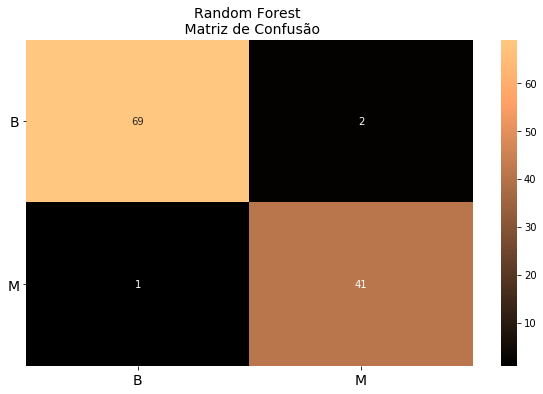

In [129]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(cm_rf, ax=ax, annot=True, cmap=plt.cm.copper)
ax.set_title("Random Forest \n Matriz de Confusão", fontsize=14)
ax.set_xticklabels(['B', 'M'], fontsize=14, rotation=0)
ax.set_yticklabels(['B', 'M'], fontsize=14, rotation=360)

In [ ]:
print("Gradient Boost Classifier")
grad_params = {'n_estimators' : [30,35,40,45,50,55,60,65,70], 'learning_rate' : [0.001,0.01,0.1,1.0], 'loss' : ['deviance','exponential'],
              'max_depth' : [3,4,5,6,7], 'max_features' : ['auto','sqrt','log2'], 'min_samples_leaf' : [2,3,4,5,6]}
grad = GridSearchCV(GradientBoostingClassifier(), grad_params,n_jobs=8,cv=10)
grad.fit(X_treino, Y_treino)
grad_boost = grad.best_estimator_
print("Best Estimator")
print(grad_boost)
grad_score = cross_val_score(grad_boost, X_treino, Y_treino, cv=10)
print('Score GradBoost Validacao Cruzada: ', round(grad_score.mean() * 100, 2).astype(str) + '%')

Gradient Boost Classifier


In [ ]:
grad_boost.fit(X_treino,Y_treino)
Y_pred_gb = grad_boost.predict(X_teste)
cm_gb = confusion_matrix(Y_teste,Y_pred_gb)
acc_score_gb = accuracy_score(Y_teste,Y_pred_gb)
f1_score_gb = f1_score(Y_teste,Y_pred_gb)
precisao_gb = average_precision_score(Y_teste,Y_pred_gb)
recall_gb = recall_score(Y_teste,Y_pred_gb)
print('Acuracia Gradient Boosting ',round(acc_score_gb*100,2).astype(str)+'%')
print('Precião média Gradient Boosting  ',round(precisao_gb*100,2).astype(str)+'%')
print('F1 Gradient Boosting  ',round(f1_score_gb*100,2).astype(str)+'%')
print('Recall Gradient Boosting  ',round(recall_gb*100,2).astype(str)+'%')

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(cm_gb, ax=ax, annot=True, cmap=plt.cm.copper)
ax.set_title("Gradient Boosting  \n Matriz de Confusão", fontsize=14)
ax.set_xticklabels(['B', 'M'], fontsize=14, rotation=0)
ax.set_yticklabels(['B', 'M'], fontsize=14, rotation=360)